<a href="https://colab.research.google.com/github/abhishekrajeevan/First_repo/blob/main/cleveland_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cleveland = pd.read_csv('/content/cleveland.csv')

In [ ]:
cleveland.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
print(cleveland.shape)
print(cleveland.columns)

(303, 14)
Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')


In [ ]:
cleveland.describe()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


We observe that ca and thal columns are objects, eventhough they should be numeric. On closely observing we find that it is due to the presenc of unknowns '?'. Let's convert this to NaN and make these columns numeric

In [ ]:
cleveland['thal'] = pd.to_numeric(cleveland['thal'], errors = 'coerce')

In [ ]:
cleveland['ca'] = pd.to_numeric(cleveland['ca'], errors = 'coerce')

In [ ]:
(cleveland == '?').any()

age         False
gender      False
cp          False
trestbps    False
chol        False
fps         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
class       False
dtype: bool

In [ ]:
cleveland.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

Let's add anew column whcih specifies whether the patient had heart disease or not (1,0)

In [ ]:
mapping = {0:0,1:1,2:1,3:1,4:1}

In [ ]:
cleveland['disease'] = cleveland['class'].map(mapping)

In [ ]:
cleveland.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


### Age

#### Distribution of age

In [ ]:
df = cleveland.copy()

In [ ]:
df['disease'] = df['disease'].astype('category')

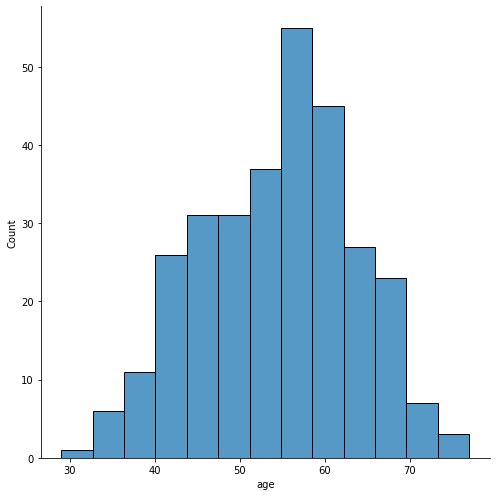

In [ ]:

sns.displot(x= 'age', data = df, kind = 'hist',height = 7, aspect = 1) # remember width = aspect * height
plt.show()

This is the distribution of age of all the patient in the dataset. Largest number of patients are between 55 and 60.  

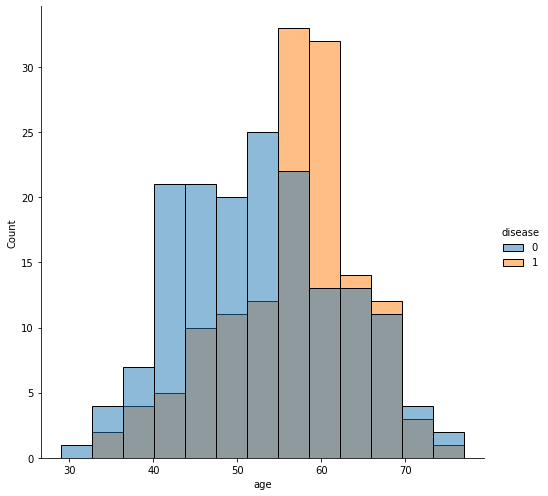

In [ ]:

sns.displot(x= 'age', data = df, kind = 'hist', hue = 'disease', height = 7, aspect = 1) # remember width = aspect * height
plt.show()

Frome above we can see that almost all of the patients beyond 60 have heart disease. While for patients below 60, the fraction of patients having heart disease is less

## Gender and disease

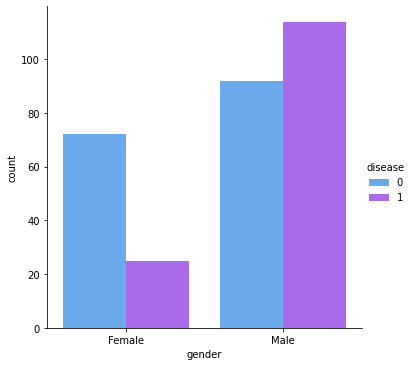

In [ ]:
g = sns.catplot(x='gender', data = df, kind = 'count',palette  = 'cool', hue = 'disease')
l = ['Female', 'Male']
g.set_xticklabels(labels= l)

plt.show()

The above graph shows that most f the patiets were male. Out of the Male patients, most of them had the disease. Out of te Female patients, most of them did not have the disease.

## Chest Pain in patients

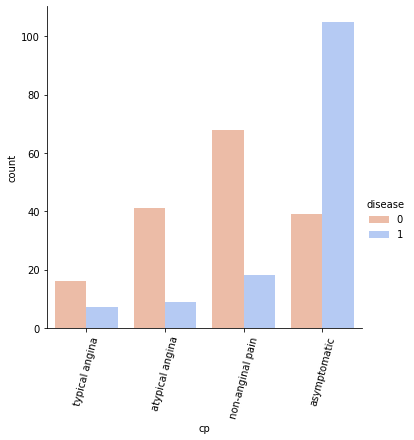

In [ ]:
g = sns.catplot(x = 'cp', data = df, kind = 'count', hue = 'disease' , palette = 'coolwarm_r')
g.set_xticklabels(labels = ['typical angina','atypical angina','non-anginal pain','asymptomatic'], rotation = 75)
plt.show()

The largest number of patients were asymptomatic chest pain type, followed by non -anginal pain, atypical angina and typicla angina.
Out of these only in  aymptomatic chest pain types patients, the majority of the patients turned out to have disease.

## trestbps and cholesterol

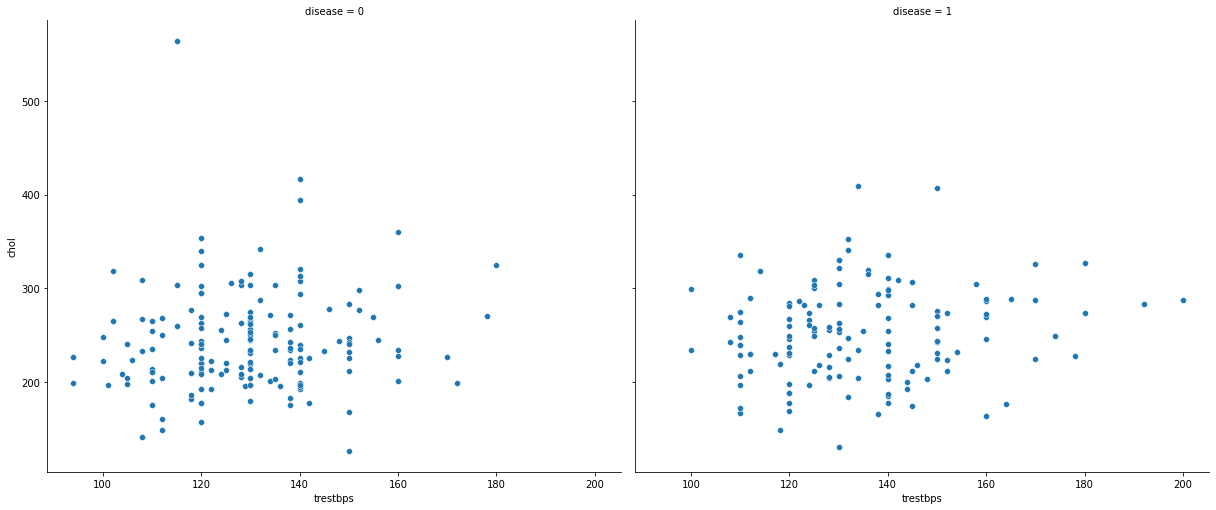

In [ ]:
sns.relplot(x='trestbps',y='chol', data = df, kind = 'scatter', col = 'disease', height = 7, aspect = 1.2 )

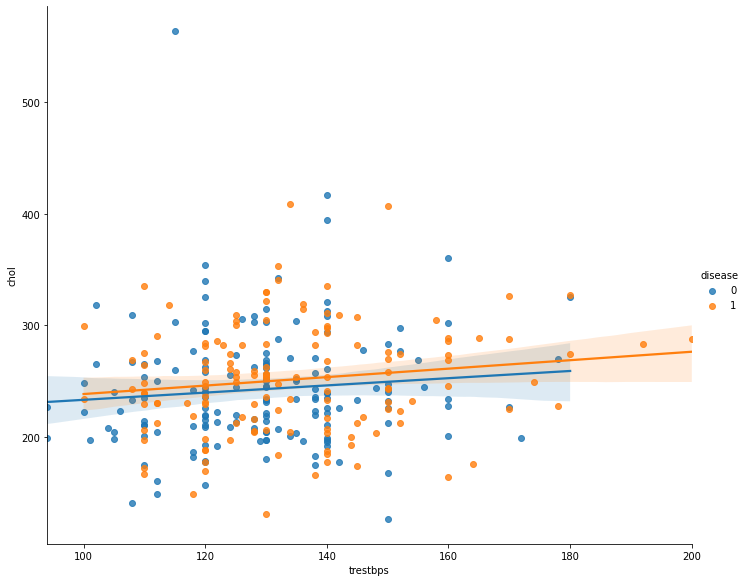

In [ ]:
sns.lmplot(x='trestbps', y='chol', data =df, hue = 'disease', height = 8, aspect = 1.2)


There seems to be a small +ve relation between bp and cholesterol in both patients who has disease who does not have.

## distribution of trestbps, chol, thalach

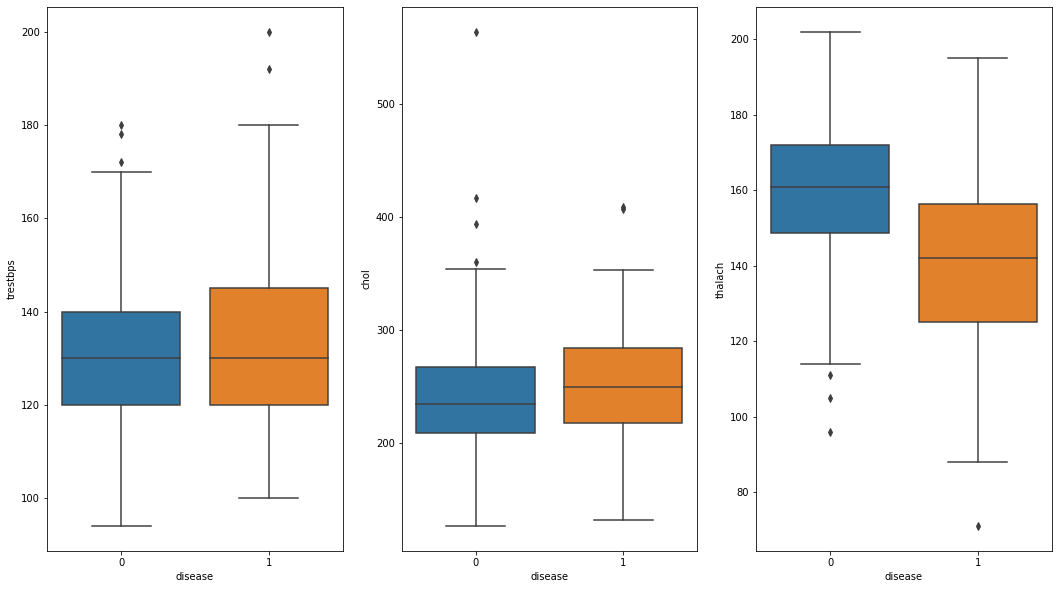

In [ ]:
cnt = 0
fig, ax = plt.subplots(1,3, figsize = (18,10))
for i in ['trestbps','chol','thalach']:
  sns.boxplot(x='disease', y= i, data = df,ax = ax[cnt])
  cnt += 1



*   The median resting bp of both sets of patiesnt (who got disease and does not have disease)  are same ans it is ~ 130 

*   The median cholesterol of patients having disease is greater than that of patient not having diseae. but the margin is very less

*   The mediian thalch of patients with disease is leass than that of patients without disease

*   Also all the distributions have outliers, so it is good to go with median as an estimate














## Oldpeak and slope

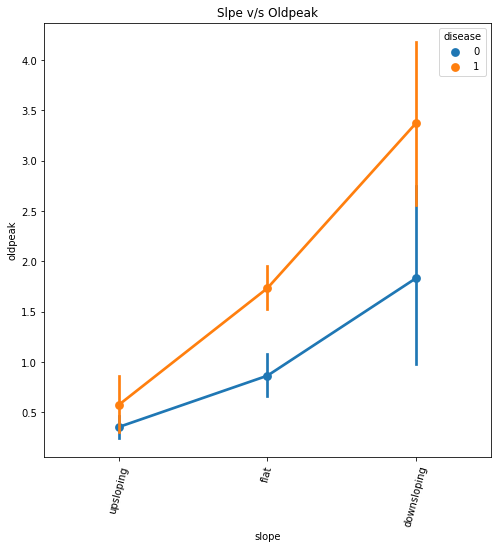

In [ ]:
fig,ax = plt.subplots(figsize = (8,8))
ax = sns.pointplot(x= 'slope', y = 'oldpeak', data = df, hue = 'disease')
ax.set_title('Slpe v/s Oldpeak')
ax.set_xticklabels(labels = ['upsloping','flat','downsloping'], rotation = 75)
plt.show()

Old peak is highes for downsloping, followed by flat and then upsloping.
**The main take away is that for patients with heart disease, the old peak is higher than the patients without disease**

Lets' try to estimate the old peak for patent with and ithout disease.

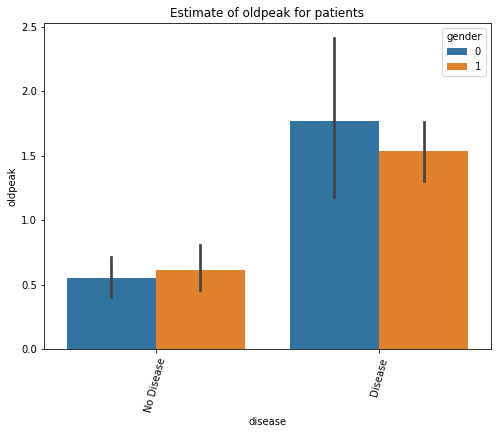

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x = 'disease', y = 'oldpeak', data = df, hue ='gender')
ax.set_title('Estimate of oldpeak for patients')
ax.set_xticklabels(labels=['No Disease', 'Disease'], rotation = 75)
plt.show()

- Definitely the old peak is higer for patients with disease by a large amount.
- Interestingly in patients without diseases, old peak is marginally high in Men compared to women, but in patients with disease the Old peak is higher in Women

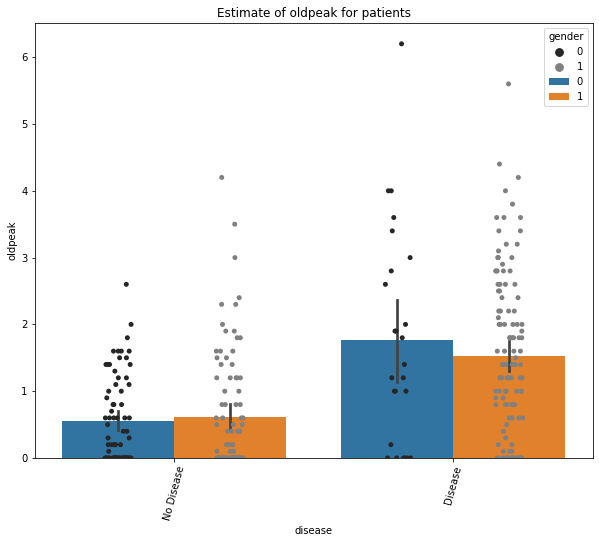

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x = 'disease', y = 'oldpeak', data = df, hue ='gender')
ax = sns.stripplot(x = 'disease', y='oldpeak', data =df, hue = 'gender', color = 'grey', dodge = True)
ax.set_title('Estimate of oldpeak for patients')
ax.set_xticklabels(labels=['No Disease', 'Disease'], rotation = 75)
plt.show()

- Look at the patients with disease and we can see that the number of data points for women is less and the erro bar is high. This is beacuse of the one very high data point, hwich might have skewed the mean of oldpeak
- SO it is better to take the median as an estimate for oldpeak

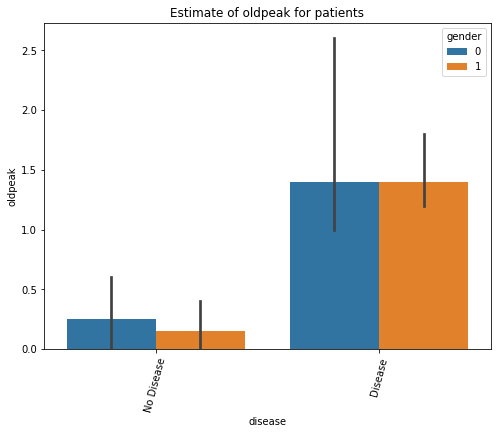

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x = 'disease', y = 'oldpeak', data = df, hue ='gender', estimator = np.median)
ax.set_title('Estimate of oldpeak for patients')
ax.set_xticklabels(labels=['No Disease', 'Disease'], rotation = 75)
plt.show()

## CA and Disease

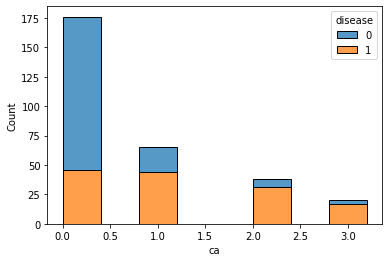

In [ ]:

sns.histplot(x = 'ca',hue = 'disease',stat = 'count', data =df, multiple = 'stack', binwidth=0.4)

plt.show()

- It can be seen that for CA > 2, the majority of the patients turned out to be having the disease